In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
from category_encoders import *
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df2 = pd.read_excel("20191219export.xlsx")


In [3]:
df2 = df2[['beds', 'baths', 'prices','property_type','closest_train_station', 'closest_school']]
df2 = df2[~df2.property_type.isnull()]
df2 = df2[df2.property_type.isin(['block_of_flats', 'land']) == False]

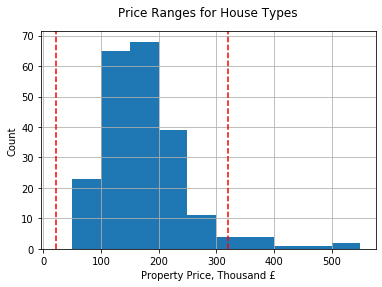

In [4]:
(df2.prices/1000).hist()

plt.title("Price Ranges for House Types",  pad=15)
plt.xlabel('Property Price, Thousand £')
plt.ylabel('Count')
plt.axvline(x=320,ls='--', color='r')
plt.axvline(x=22,ls='--', color='r')
plt.savefig('price_freq.png', bbox_inches='tight', dpi=300)

plt.show()

In [5]:
bat = df2[['baths','prices']].groupby('baths').count().reset_index()
bat['%%'] = round(bat.prices/(sum(bat.prices)-12)*100,2)
bat.sort_values('%%', ascending=False)

,baths,prices,%%
0,1,167,81.07
1,2,37,17.96
3,"""""",12,5.83
2,3,2,0.97


In [6]:
from scipy import stats
t_val, p_val = stats.ttest_1samp(pd.to_numeric(df2.baths[df2.baths != '""']),0 )

# obtain a one-tail p-value
p_val

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 40.59584703085187, p-value: 5.857662289872613e-100


In [7]:
df2.baths[df2.baths == '""'] = 1

df2.baths = pd.to_numeric(df2.baths)
df2.beds = pd.to_numeric(df2.beds)
df2 = df2[df2.prices <  322971.06 ]


df2.to_excel('cleared.xlsx')

In [8]:
margins = df2[['property_type', 'prices','beds']]


aa = margins.groupby(['property_type'],as_index=True).agg(
    PriceMin=pd.NamedAgg(column='prices', aggfunc='min'),
    PriceMax=pd.NamedAgg(column='prices', aggfunc='max'),
    PriceAverage=pd.NamedAgg(column='prices', aggfunc=np.mean,),
    BedAverage=pd.NamedAgg(column='beds', aggfunc=np.mean,),
    Count = pd.NamedAgg(column='prices', aggfunc='count')).reset_index()

aa['%%'] = round(aa.Count/sum(aa.Count)*100,2)
aa.sort_values('%%', ascending=False)

,property_type,PriceMin,PriceMax,PriceAverage,BedAverage,Count,%%
8,terraced,80000,255000,159696.551724,2.706897,58,27.88
6,semi_detached,70000,270000,191682.254902,2.843137,51,24.52
4,flat,50000,160000,104247.916667,1.833333,48,23.08
3,end_terrace,140000,225000,178774.944444,2.833333,18,8.65
1,detached,125000,320000,250166.666667,3.333333,15,7.21
5,maisonette,50000,139995,103849.500000,2.000000,10,4.81
10,town_house,160000,219950,194983.333333,3.333333,3,1.44
0,bungalow,200000,200000,200000.000000,2.000000,2,0.96
2,detached_bungalow,210000,210000,210000.000000,3.000000,1,0.48
7,semi_detached_bungalow,179950,179950,179950.000000,2.000000,1,0.48


In [9]:
margins = df2[['property_type', 'beds']]


aa = margins.groupby(['property_type'],as_index=True).agg(
    PriceMin=pd.NamedAgg(column='beds', aggfunc='min'),
    PriceMax=pd.NamedAgg(column='beds', aggfunc='max'),
    PriceAverage=pd.NamedAgg(column='beds', aggfunc=np.mean,),

    Count = pd.NamedAgg(column='beds', aggfunc='count')).reset_index()

aa['%%'] = round(aa.Count/sum(aa.Count)*100,2)
aa.sort_values('%%', ascending=False)

,property_type,PriceMin,PriceMax,PriceAverage,Count,%%
8,terraced,2,4,2.706897,58,27.88
6,semi_detached,2,4,2.843137,51,24.52
4,flat,1,2,1.833333,48,23.08
3,end_terrace,2,4,2.833333,18,8.65
1,detached,1,5,3.333333,15,7.21
5,maisonette,1,3,2.000000,10,4.81
10,town_house,2,4,3.333333,3,1.44
0,bungalow,2,2,2.000000,2,0.96
2,detached_bungalow,3,3,3.000000,1,0.48
7,semi_detached_bungalow,2,2,2.000000,1,0.48


In [10]:
aa.Count.sum()

208

In [11]:
df2.property_type[df2.property_type == 'maisonette'] = 'flat'
df2.property_type[df2.property_type == 'semi_detached_bungalow'] = 'semi_detached'
df2.property_type[df2.property_type == 'town_house'] = 'terraced'
df2.property_type[df2.property_type == 'terraced_bungalow'] = 'terraced'
df2.property_type[df2.property_type == 'detached_bungalow'] = 'detached'
df2.property_type[df2.property_type == 'end_terrace'] = 'semi_detached'
df2.property_type[df2.property_type == 'bungalow'] = 'semi_detached'


/Users/Edite/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Edite/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Edite/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [12]:
margins = df2[['property_type', 'prices','beds', 'baths']]


aa = margins.groupby(['property_type'],as_index=True).agg(
    PriceMin=pd.NamedAgg(column='prices', aggfunc='min'),
    PriceMax=pd.NamedAgg(column='prices', aggfunc='max'),
    PriceAverage=pd.NamedAgg(column='prices', aggfunc=np.mean,),
    BedAverage=pd.NamedAgg(column='beds', aggfunc=np.mean,),
    BathAverage=pd.NamedAgg(column='baths', aggfunc=np.mean,),
    Count = pd.NamedAgg(column='prices', aggfunc='count')).reset_index()

aa['%%'] = round(aa.Count/sum(aa.Count)*100,2)
aa.sort_values('%%', ascending=False)

aa.property_type = aa.property_type.str.title()

In [13]:
aa

,property_type,PriceMin,PriceMax,PriceAverage,BedAverage,BathAverage,Count,%%
0,Detached,125000,320000,247656.250000,3.312500,1.250000,16,7.69
1,Flat,50000,160000,104179.224138,1.862069,1.103448,58,27.88
2,Semi_Detached,70000,270000,188523.527778,2.805556,1.236111,72,34.62
3,Terraced,80000,255000,160925.000000,2.709677,1.145161,62,29.81


In [14]:
margins = df2[['property_type', 'prices','beds']]


bb = margins.groupby(['beds'],as_index=True).agg(
    PriceMin=pd.NamedAgg(column='prices', aggfunc='min'),
    PriceMax=pd.NamedAgg(column='prices', aggfunc='max'),
    PriceAverage=pd.NamedAgg(column='prices', aggfunc=np.mean,),
    
    Count = pd.NamedAgg(column='prices', aggfunc='count')).reset_index()

bb['%%'] = round(bb.Count/sum(bb.Count)*100,2)
bb.sort_values('Count', ascending=False)

,beds,PriceMin,PriceMax,PriceAverage,Count,%%
2,3,80000,275000,188402.063830,94,45.19
1,2,50000,200000,127712.443182,88,42.31
3,4,180000,285000,224996.153846,13,6.25
0,1,65000,130000,96590.909091,11,5.29
4,5,300000,320000,310000.000000,2,0.96


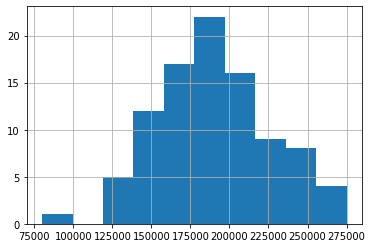

In [15]:
df2[df2.beds ==3]['prices'].hist()

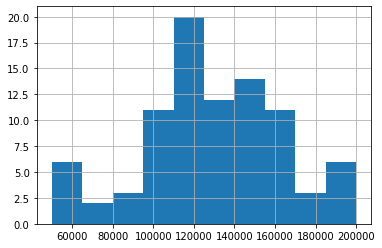

In [16]:
df2[df2.beds ==2]['prices'].hist()

In [17]:
x1 = df2[df2.beds ==1] [['beds', 'prices']]
x2 = df2[df2.beds ==2] [['beds', 'prices']]


Text(0, 0.5, 'Density')

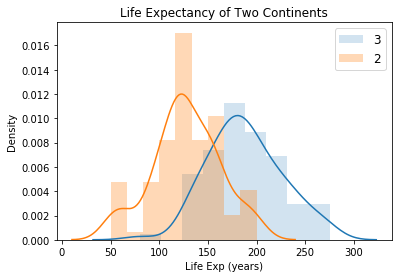

In [18]:
#df =df2[df2.beds ==5]
#sns.distplot(df['prices']/1000, label='5', hist = True, kde = False, hist_kws=dict(alpha=.1))
#df =df2[df2.beds ==4]
#sns.distplot(df['prices']/1000, label='4', hist = True, kde = False, hist_kws=dict(alpha=.2))
df =df2[(df2.beds ==3) & (df2.prices < 300000)]
sns.distplot(df['prices']/1000, label='3', hist = True, kde = True, hist_kws=dict(alpha=.2))
df =df2[df2.beds ==2]
sns.distplot(df['prices']/1000, label='2', hist = True, kde = True, hist_kws=dict(alpha=.3))
#df = df2[df2.beds ==1] 
#sns.distplot(df['prices']/1000, label='1', hist = True, kde = False, hist_kws=dict(alpha=1))

plt.legend(prop={'size': 12})
plt.title('Life Expectancy of Two Continents')
plt.xlabel('Life Exp (years)')
plt.ylabel('Density')

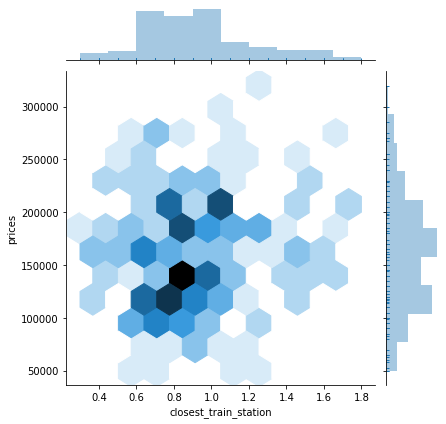

In [19]:
sns.jointplot(x=df2["closest_train_station"], y=df2["prices"], kind='hex', marginal_kws=dict(bins=10, rug=True))

In [20]:
cat_columns = ["beds", "property_type", "baths"]

df_processed = pd.get_dummies(df2, prefix_sep="__",
                              columns=cat_columns)

In [21]:
df_processed['beds_2_3'] = df_processed.beds__2 + df_processed.beds__3

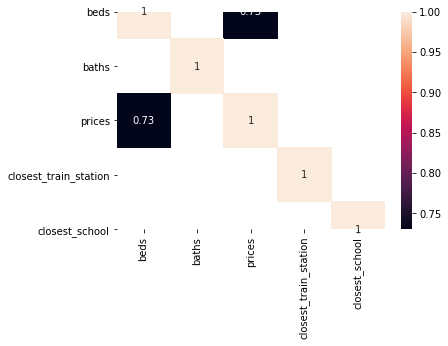

In [22]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = df2.corr()

# plot the heatmap
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
        xticklabels=corr.columns,
        yticklabels=corr.columns
           ,annot=True)

In [23]:
corr2 = corr.stack().reset_index()

corr2.rename(columns={0: "Correlation"}, errors="raise", inplace=True)

corr2 = corr2[corr2.level_0 != corr2.level_1 ].sort_values('Correlation', ascending=False)

corr2[(corr2.Correlation < -0.5) | (corr2.Correlation >0.5)]

,level_0,level_1,Correlation
2,beds,prices,0.730112
10,prices,beds,0.730112


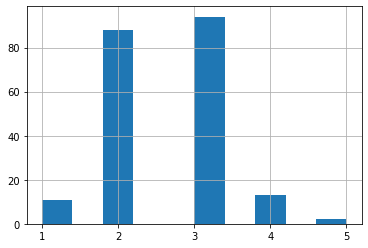

In [24]:
import math
yint = range(0, math.ceil(max(df2.beds))+1)
plt.xticks(yint)

df2.beds.hist(bins = 10, align ='mid')

null_columns=df2.columns[df2.isnull().any()]
df2[null_columns].isnull().sum()
df2[df2.isnull().any(axis=1)][null_columns]

In [25]:
df = df_processed.sample(100)

In [26]:
target = df.prices

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt


sns.regplot(x=df2["prices"]/1000, y=df2["beds"])
plt.xlabel('Property Price, Thousand £')
plt.ylabel('Count of Bedrooms')
plt.title('House Price Relationship to Bedroom Count', pad=15)

plt.savefig('bedrooms.png'
            #, bbox_inches='tight'
            , dpi=300)

In [27]:
df_processed.columns

Index(['prices', 'closest_train_station', 'closest_school', 'beds__1',
       'beds__2', 'beds__3', 'beds__4', 'beds__5', 'property_type__detached',
       'property_type__flat', 'property_type__semi_detached',
       'property_type__terraced', 'baths__1', 'baths__2', 'beds_2_3'],
      dtype='object')

In [28]:
X = df_processed[['closest_train_station', 'closest_school', 'beds__1',
       'beds_2_3','beds__4', 'property_type__detached',
       'property_type__flat', 'property_type__semi_detached',
       'baths__2']]
y = df_processed.prices

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 prices   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              512.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):                   1.85e-132
Time:                        00:16:05   Log-Likelihood:                         -2468.4
No. Observations:                 208   AIC:                                      4955.
Df Residuals:                     199   BIC:                                      4985.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
closest_train_station         2654.9391   8226.728      0.323      0.747   -1.36e+04    1.89e+04
closest_school                6.863e+04   2.25e+04      3.050      0.003    2.43e+04    1.13e+05
beds__1                        1.01e+05   1.47e+04      6.872      0.000     7.2e+04     1.3e+05
beds_2_3                      1.277e+05   1.01e+04     12.654      0.000    1.08e+05    1.48e+05
beds__4                       1.595e+05   1.44e+04     11.103      0.000    1.31e+05    1.88e+05
property_type__detached       1.016e+05   1.02e+04      9.980      0.000    8.15e+04    1.22e+05
property_type__flat          -4.304e+04   6670.798     -6.452      0.000   -5.62e+04   -2.99e+04
property_type__semi_detached  3.189e+04   6175.899      5.164      0.000    1.97e+04    4.41e+04
baths__2                      1.302e+04   6923.231      1.880      0.062    -633.930    2.67e+04
==============================================================================
Omnibus:                       63.379   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              429.937
Skew:                           0.955   Prob(JB):                     4.37e-94
Kurtosis:                       9.779   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X,y)
lm.coef_
lm.intercept_
lm.score(X,y)

0.7173951285136355

In [30]:
df2.columns

Index(['beds', 'baths', 'prices', 'property_type', 'closest_train_station',
       'closest_school'],
      dtype='object')

df =aa

df.PriceMax = df.PriceMax/1000
df.PriceMin = df.PriceMin/1000

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, max(df.PriceMax)+100, 50)
minor_ticks = np.arange(0, max(df.PriceMax), 12.5)

ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ordered_df = df.sort_values(by='PriceMax')
my_range=range(1,len(df.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.hlines(y=my_range, xmin= ordered_df['PriceMin']
           , xmax=ordered_df['PriceMax'], color='black', alpha=0.4, linewidth=4)
plt.scatter(ordered_df['PriceMin'], my_range, color='skyblue', alpha=1, label='PriceMin', linewidth=4)
plt.scatter(ordered_df['PriceMax'], my_range, color='green', alpha=0.4 , label='PriceMax', linewidth=4)
plt.legend()
#plt.grid(True,which='both')


 
# Add title and axis names
plt.yticks(my_range, ordered_df['property_type'])
plt.title("Price Ranges for House Types",  pad=15)
plt.xlabel('Property Price, Thousand £')
plt.ylabel('Property Type')
plt.savefig('prices.png', bbox_inches='tight', dpi=300)

plt.show()

In [31]:
from scipy import stats
t_val, p_val = stats.ttest_1samp(df2['prices'],212483 )

# obtain a one-tail p-value
p_val /= 2

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: -14.093191822378468, p-value: 2.2808800763673965e-32


In [32]:
df2.head()

,beds,baths,prices,property_type,closest_train_station,closest_school
0,3,2,270000,semi_detached,0.6,0.6
2,2,1,185000,semi_detached,1.6,0.4
3,2,1,125000,flat,1.0,0.4
4,2,1,150000,terraced,0.8,0.1
5,4,2,205000,terraced,0.8,0.3


In [33]:
df2.beds.describe()

count    208.000000
mean       2.552885
std        0.733657
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: beds, dtype: float64

In [34]:
df_processed.describe()

,prices,closest_train_station,closest_school,beds__1,beds__2,beds__3,beds__4,beds__5,property_type__detached,property_type__flat,property_type__semi_detached,property_type__terraced,baths__1,baths__2,beds_2_3
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,161326.629808,0.908173,0.307212,0.052885,0.423077,0.451923,0.062500,0.009615,0.076923,0.278846,0.346154,0.298077,0.826923,0.173077,0.875000
std,52350.643664,0.295180,0.107658,0.224343,0.495239,0.498884,0.242645,0.097821,0.267112,0.449514,0.476891,0.458517,0.379226,0.379226,0.331517
min,50000.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124375.000000,0.700000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,160000.000000,0.800000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,198499.250000,1.100000,0.400000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,320000.000000,1.800000,0.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df_processed['beds_2_3'] = df_processed.beds__2 + df_processed.beds__3

In [36]:
df_processed['beds_2_3'].describe()

count    208.000000
mean       0.875000
std        0.331517
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: beds_2_3, dtype: float64

In [37]:
df_processed.columns

Index(['prices', 'closest_train_station', 'closest_school', 'beds__1',
       'beds__2', 'beds__3', 'beds__4', 'beds__5', 'property_type__detached',
       'property_type__flat', 'property_type__semi_detached',
       'property_type__terraced', 'baths__1', 'baths__2', 'beds_2_3'],
      dtype='object')

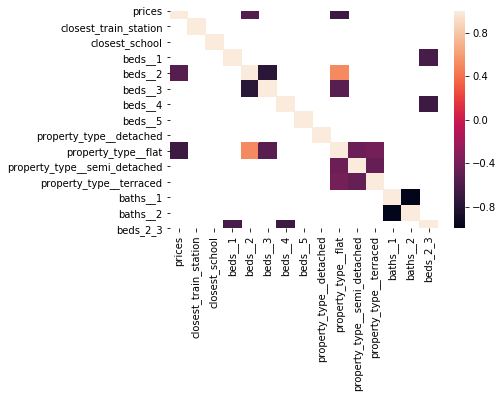

In [38]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = df_processed[['prices', 'closest_train_station', 'closest_school', 'beds__1',
       'beds__2', 'beds__3', 'beds__4', 'beds__5', 'property_type__detached',
       'property_type__flat', 'property_type__semi_detached',
       'property_type__terraced', 'baths__1', 'baths__2', 'beds_2_3']].corr()

# plot the heatmap
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [98]:
from scipy.stats import ttest_1samp
import numpy as np

tset, pval = ttest_1samp(df2[df2.property_type == 'flat']['prices'], 137832 )
print("p-values",pval)
print("{0:.7%}".format(pval))
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")


p-values 6.951817685830847e-15
0.0000000%
 we are rejecting null hypothesis


In [60]:
df2.columns


Index(['beds', 'baths', 'prices', 'property_type', 'closest_train_station',
       'closest_school'],
      dtype='object')

In [62]:
df2.property_type.unique()

array(['semi_detached', 'flat', 'terraced', 'detached'], dtype=object)

In [101]:
df_processed.to_excel("processed.xlsx")